In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import librosa
import sys

In [31]:
def save_file(audio_array: np.array,
              path_file: str = "augmented_data",
              sample_rate: int = 22050):
  
    scaled = np.int16(audio_array / np.max(np.abs(audio_array)) * 32767)
    write(path_file, sample_rate, scaled)

In [12]:
def extract_signal(path):
  signal, _ = librosa.load(path, sr=22050)
  return signal

In [16]:
def plot_signal(signal: np.array,
                title:str):
    plt.figure(1)
    plt.title(title)
    plt.plot(signal)
    plt.show()

In [13]:
def add_noise(data, noise_factor):
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise
    # Cast back to same data type
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data

In [50]:
def create_augmented_noise_song(original_signal,
                          noise_factor):
  augmented_signal = add_noise(original_signal, noise_factor)
  plot_signal(augmented_signal, f"Augmented Song: add noise: {noise_factor}")
  save_file(augmented_signal, f"noise_{noise_factor}.wav")
  

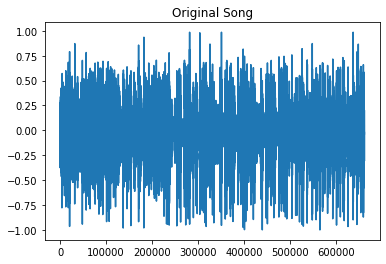

In [48]:
song_path = "/content/hip_hop_test.wav"
signal = extract_signal(song_path)
plot_signal(signal, "Original Song")

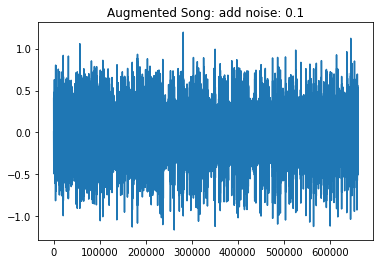

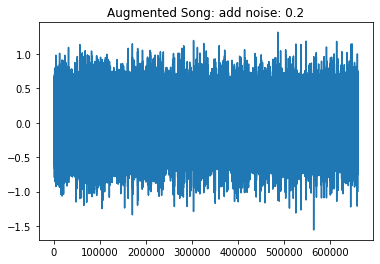

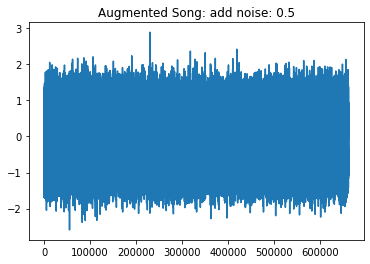

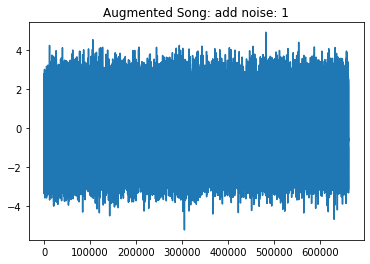

In [51]:
create_augmented_noise_song(signal, 0.1)
create_augmented_noise_song(signal, 0.2)
create_augmented_noise_song(signal, 0.5)
create_augmented_noise_song(signal, 1)

In [42]:
def shifting_time(data,
                  sampling_rate: 22050,
                  shift_max,
                  shift_direction):
  
    shift = np.random.randint(sampling_rate * shift_max)
    if shift_direction == 'right':
        shift = -shift
    elif shift_direction == 'both':
        direction = np.random.randint(0, 2)
        if direction == 1:
            shift = -shift
    augmented_data = np.roll(data, shift)
    # Set to silence for heading/ tailing
    if shift > 0:
        augmented_data[:shift] = 0
    else:
        augmented_data[shift:] = 0
    return augmented_data

In [40]:
def create_augmented_shifting_song(original_signal,
                                   shift_max,
                                   shift_direction):
  augmented_signal = shifting_time(original_signal, 22050, shift_max, shift_direction)
  plot_signal(augmented_signal, f"Augmented Song shifting, direction: {shift_direction}, max: {shift_max}")
  save_file(augmented_signal, f"shift_{shift_max}_{shift_direction}.wav")

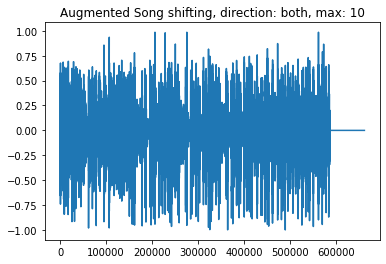

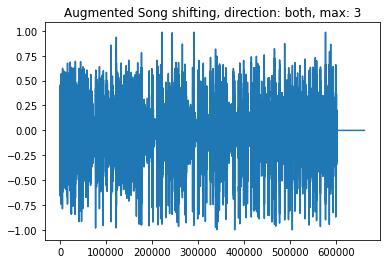

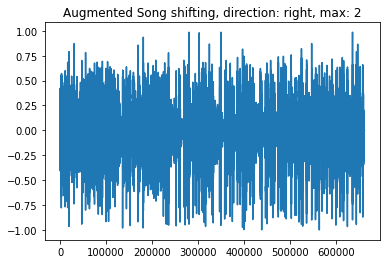

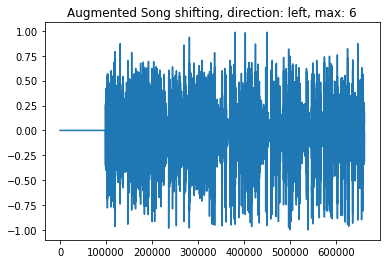

In [56]:
create_augmented_shifting_song(signal, 10, 'both')
create_augmented_shifting_song(signal, 3, 'both')
create_augmented_shifting_song(signal, 2, 'right')
create_augmented_shifting_song(signal, 6, 'left')